In [ ]:
# another github repo:
# https://github.com/aweinstein/bandit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Slot Machine - RL model (section 3.1)

In [2]:
from Daw.q_learning import q_learning

num_trials = 300
alpha = 0.5
beta = 1

choice_hist, reward_hist, q_l, q_r = q_learning(alpha, beta, num_trials)

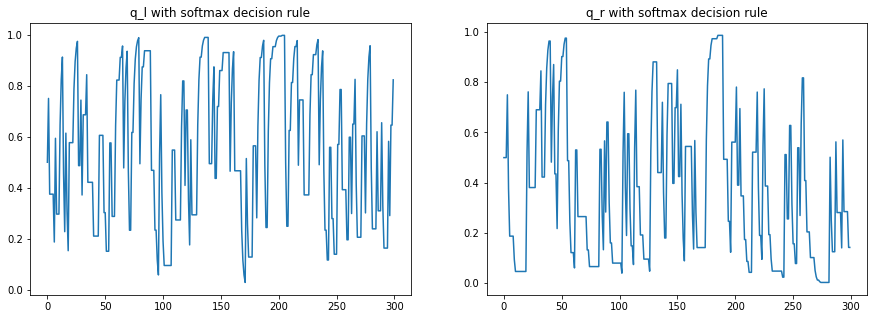

mean q_l:  0.56052244921
mean q_r:  0.371404762768


In [3]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(q_l)
plt.title('q_l with softmax decision rule')

plt.subplot(122)
plt.plot(q_r)
plt.title('q_r with softmax decision rule')
plt.show()

print('mean q_l: ', np.mean(q_l))
print('mean q_r: ', np.mean(q_r))

In [4]:
import Daw.p_grid as pg

alpha_len = 40
alpha_low = 0
alpha_up = 1

beta_len = 40
beta_low = 0
beta_up = 2

p_grid = pg.p_grid(alpha_len, alpha_low, alpha_up,beta_len, beta_low, beta_up, choice_hist, reward_hist)

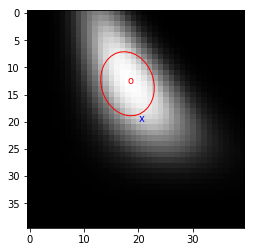

In [6]:
from matplotlib.patches import Ellipse
import Daw.utils as ut

grid_max = np.where(p_grid == np.min(p_grid))
std_dev  = np.zeros((2,1))
std_dev[0] = 2*np.std(p_grid[grid_max[0],:])
std_dev[1] = 2*np.std(p_grid[:, grid_max[1]])

p_grid_flipped = np.flipud(p_grid)
ax = plt.subplot(111)

for j in range(1, 2):
    ell = Ellipse(xy=(grid_max[1], alpha_len - grid_max[0]),
                  width=std_dev[0]*j*2, height=std_dev[1]*j*2,
                  angle=np.rad2deg(np.arccos(0.3)))
    ell.set_facecolor('none')
    ell.set_edgecolor('red')
    ax.add_artist(ell)
    
plt.imshow(-np.exp(-p_grid_flipped), cmap='Greys')#, interpolation="Nearest")
plt.annotate('o', xy=(grid_max[1], alpha_len - grid_max[0]), color='r')
plt.annotate('x', xy=(ut.find_nearest_idx(np.linspace(alpha_low, alpha_up, alpha_len), alpha),
                      alpha_len - ut.find_nearest_idx(np.linspace(beta_low, beta_up, beta_len), beta)), color='b')
plt.show()

In [7]:
# 3.3 Intersubject variability and random effects
import Daw.sample_subjects as ss
import numpy as np

np.random.seed(1)
num_subjects = 40

#alpha distribution
alpha_mean = 0.6
alpha_std = 0.1

#beta distribution
beta_mean = 1
beta_std = 0.3

results_sampling = ss.sample_subjects(alpha_mean, alpha_std, alpha_low, alpha_up, beta_mean, beta_std, beta_low, 
                                      beta_up, num_subjects)
alpha_subjects = results_sampling[0]
beta_subjects = results_sampling[1]



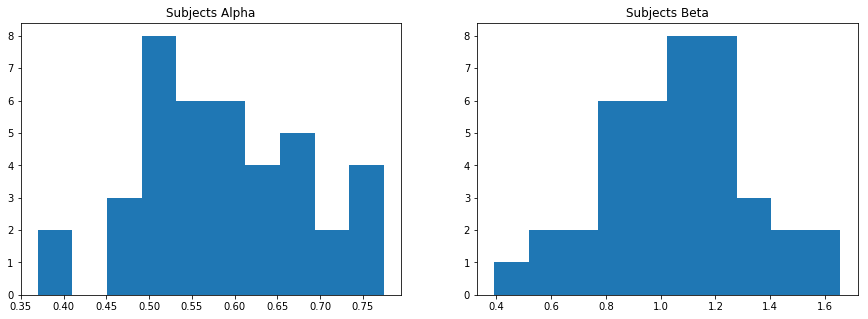

In [8]:
# Visualize sampled parameters
# for 10,000 subjects, normal distribution well observable

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Subjects Alpha")
plt.hist(alpha_subjects)

plt.subplot(122)
plt.title("Subjects Beta")
plt.hist(beta_subjects)
plt.show()

In [9]:
import Daw.regressLL as rll
from scipy.optimize import minimize

num_trials_ss = 1000
initParams = [0.8, 0.8]

choice_hist_subj = []
reward_hist_subj = []
results = []

for i in range(num_subjects):
    temp_results = q_learning(alpha_subjects[i], beta_subjects[i], num_trials_ss)
    choice_hist_subj.append(temp_results[0])
    reward_hist_subj.append(temp_results[1])

    # Run the minimizer
    results.append(minimize(rll.regressLL_q, initParams, args=(
                choice_hist_subj[-1], reward_hist_subj[-1]), method='nelder-mead').x)
    

C:\Users\Chris\Documents\3_Uni\1_MSc Neuroengineering\Semester 4\Research\Daw\make_choices.py:27: RuntimeWarning: overflow encountered in exp
  choice_log = beta * choice_target - np.log(np.exp(beta * choice_target) + np.exp(beta * choice_other))


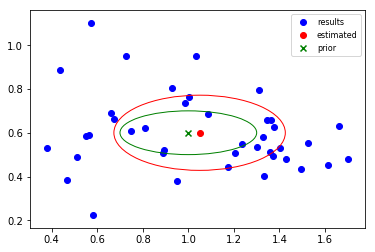

alpha_mean_est:  0.599816789284 
 beta_mean_est:  1.04946597918


In [10]:
from scipy.stats import norm
import Daw.utils as ut

results_arr = np.asarray(results)
alpha_mean_est, alpha_std_est = norm.fit(results_arr[:,0])
beta_mean_est, beta_std_est = norm.fit(results_arr[:,1])

ax = plt.subplot(111)

ax.add_artist(ut.draw_ellipse(alpha_mean_est, alpha_std_est, beta_mean_est, beta_std_est, 'red', 0))
ax.add_artist(ut.draw_ellipse(alpha_mean, alpha_std, beta_mean, beta_std, 'green', 0))


plt.scatter(results_arr[:,1], results_arr[:,0], c='b')
plt.scatter(beta_mean_est, alpha_mean_est, c='r', marker= 'o')
plt.scatter(beta_mean, alpha_mean, c='g', marker= 'x')
plt.legend(['results', 'estimated', 'prior'], prop={'size': 8})
plt.show()
print('alpha_mean_est: ', alpha_mean_est, '\n beta_mean_est: ', beta_mean_est)

In [15]:
### RE-ESTIMATE ###

alpha_subjects_re, beta_subjects_re = ss.sample_subjects(alpha_mean_est, alpha_std_est, alpha_low, alpha_up, 
                                                      beta_mean_est, beta_std_est, beta_low, beta_up, num_subjects)


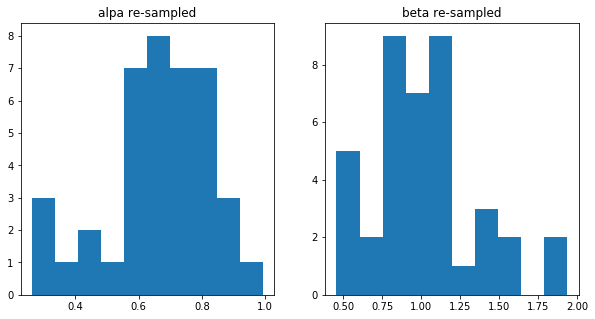

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('alpa re-sampled')
plt.hist(alpha_subjects_re)

plt.subplot(122)
plt.title('beta re-sampled')
plt.hist(beta_subjects_re)

plt.show()

In [23]:

choice_hist_subj_re = []
reward_hist_subj_re = []
results_re = []

for i in range(num_subjects):
    temp_results = q_learning(alpha_subjects_re[i], beta_subjects_re[i], num_trials)
    choice_hist_subj_re.append(temp_results[0])
    reward_hist_subj_re.append(temp_results[1])

    # Run the minimizer
    results_re.append(minimize(rll.regressLL_q, initParams, args=(
                choice_hist_subj_re[-1], reward_hist_subj_re[-1]), method='nelder-mead').x)

C:\Users\Chris\Documents\3_Uni\1_MSc Neuroengineering\Semester 4\Research\Daw\make_choices.py:27: RuntimeWarning: overflow encountered in exp
  choice_log = beta * choice_target - np.log(np.exp(beta * choice_target) + np.exp(beta * choice_other))
C:\Users\Chris\Documents\3_Uni\1_MSc Neuroengineering\Semester 4\Research\Daw\make_choices.py:27: RuntimeWarning: divide by zero encountered in log
  choice_log = beta * choice_target - np.log(np.exp(beta * choice_target) + np.exp(beta * choice_other))
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


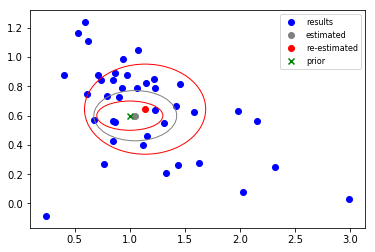

alpha_mean_re_est:  0.64439329552 
 beta_mean_re_est:  1.13863842753
alpha_mean_est:  0.599816789284 
 beta_mean_est:  1.04946597918


In [25]:
results_re_arr = np.asarray(results_re)
alpha_mean_re_est, alpha_std_re_est = norm.fit(results_re_arr[:,0])
beta_mean_re_est, beta_std_re_est = norm.fit(results_re_arr[:,1])

ax = plt.subplot(111)

ax.add_artist(ut.draw_ellipse(alpha_mean_est, alpha_std_est, beta_mean_est, beta_std_est, 'gray', 0))
ax.add_artist(ut.draw_ellipse(alpha_mean_re_est, alpha_std_re_est, beta_mean_re_est, beta_std_re_est, 'red', 0))
ax.add_artist(ut.draw_ellipse(alpha_mean, alpha_std, beta_mean, beta_std, 'red', 0))
    
#plt.scatter(results_arr[:,1], results_arr[:,0], c='gray')
plt.scatter(results_re_arr[:,1], results_re_arr[:,0], c='b')
plt.scatter(beta_mean_est, alpha_mean_est, c='gray', marker= 'o')
plt.scatter(beta_mean_re_est, alpha_mean_re_est, c='r', marker= 'o')
plt.scatter(beta_mean, alpha_mean, c='g', marker= 'x')
plt.legend(['results', 'estimated', 're-estimated', 'prior'], prop={'size': 8})
plt.show()
print('alpha_mean_re_est: ', alpha_mean_re_est, '\n beta_mean_re_est: ', beta_mean_re_est)
print('alpha_mean_est: ', alpha_mean_est, '\n beta_mean_est: ', beta_mean_est)

# Figure 4 - Likelihood Ratio Test

In [ ]:
#--------------------------------------#
# Sample parameters alpha, beta

alpha_mean_lrt = 0.4
alpha_std_lrt = 0.25
beta_mean_lrt = 1
beta_std_lrt = 1
num_subjects_lrt = 20

alpha_subjects_lrt, beta_subjects_lrt = ss.sample_subjects(alpha_mean_lrt, alpha_std_lrt, alpha_low, alpha_up, 
                                          beta_mean_lrt, beta_std_lrt, beta_low, beta_up, num_subjects_lrt)

#--------------------------------------#
# Generate data with standard q-learning
# have 20 data sets that will be used for following sections

num_trials_lrt = 300

choice_hist_subj = []
reward_hist_subj = []
results = []

for i in range(num_subjects):
    temp_results = q_learning(alpha_subjects_lrt[i], beta_subjects_lrt[i], num_trials_lrt)
    choice_hist_subj.append(temp_results[0])
    reward_hist_subj.append(temp_results[1])

    
#--------------------------------------#
# Do MLE of params "simple model"

results_simple = []
init_params_simple = [0.5, 1]
init_params_complex = [0.5, 1, 0.5]

for i in range(num_subjects):
    # Run the minimizer
    results_simple.append(minimize(regressLL, init_params_simple, args=(
                choice_hist_subj[i], reward_hist_subj[i]), method='nelder-mead').x)
    
    
#--------------------------------------#
# Do MLE of params "complex model"

results_complex = []

for i in range(num_subjects):
    # Run the minimizer
    results_complex.append(minimize(regressLL_complex_q, init_params_complex, args=(
                choice_hist_subj[i], reward_hist_subj[i]), method='nelder-mead').x)
    
#--------------------------------------#
# Compute LRT

ml_simple = []
ml_complex = []
lrt = []
for i in range(num_subjects):
    ml_simple.append(regressLL(results_simple[i], choice_hist_subj[i], reward_hist_subj[i]))
    ml_complex.append(regressLL_complex_q(results_complex[i], choice_hist_subj[i], reward_hist_subj[i]))
    
    lrt.append(2*(ml_complex[-1] - ml_simple[-1]))
    


#--------------------------------------#
# Plot results

#plt.plot(results_complex.x[:,2], lrt[:])

In [ ]:
lrt_inv = [i * (-1) for i in lrt]
plt.vlines(np.asarray(results_complex)[:,2], 0,lrt_inv[:], colors = 'b')
plt.hlines(1.9, -0.5,0.5, colors = 'gray', linestyles='dashed')
plt.scatter(np.asarray(results_complex)[:,2],lrt_inv[:])
plt.xlim([-0.5,0.5])
plt.ylim([0,7])
plt.show()
#np.asarray(results_complex)[:,2]


### Figure 5 - Simulation with Value Iteration

In [ ]:
import numpy as np

#---------------------------------#
# draw candidate parameter settings

alpha_mean = 0.6
alpha_std = 0.25
beta_mean = 0.8
beta_std = 1
num_subjects = 20
results_sampling_lrt = sample_subjects(alpha_mean, alpha_std, beta_mean, beta_std, num_subjects)

alpha_subjects = results_sampling_lrt[0]
beta_subjects = results_sampling_lrt[1]


#---------------------------------#
# compute likelihood for each
    #via regressLL
    
num_trials = 400

# simulation with q
choice_hist_subj_q = []
reward_hist_subj_q = []

results_q_q = []
results_param_q_q = []

results_q_p = []
results_param_q_p = []

# simulation with policy
choice_hist_subj_p = []
reward_hist_subj_p = []

results_p_q = []
results_param_p_q = []

results_p_p = []
results_param_p_p = []



for i in range(num_subjects):
    #simulation with Q_Learning model
    temp_results_q = q_learning(alpha_subjects[i], beta_subjects[i], num_trials)
    choice_hist_subj_q.append(temp_results_q[0])
    reward_hist_subj_q.append(temp_results_q[1])
    
    # fitting data with Q_Learning model
    results_q_q.append(regressLL_q([alpha_subjects[i], beta_subjects[i]], temp_results_q[0], temp_results_q[1]))
    results_param_q_q.append(minimize(regressLL_q, [alpha_subjects[i], beta_subjects[i]], args=(temp_results_q[0],
                                                                                          temp_results_q[1]),
                                  method = 'nelder-mead').x)
    
    #fitting data with Policy Iteration
    results_q_p.append(regressLL_p([beta_subjects[i]], temp_results_q[0], temp_results_q[1], num_trials))
    results_param_q_p.append(minimize(regressLL_p, [beta_subjects[i]], args=(temp_results_q[0],
                                                                                          temp_results_q[1], num_trials),
                                  method = 'nelder-mead').x)
    
    
    #simulation with Policy_Learning model
    temp_results_p = policy_learning(beta_subjects[i], num_trials)
    choice_hist_subj_p.append(temp_results_p[0])
    reward_hist_subj_p.append(temp_results_p[1])
    
    # fitting data with Q_Learning model
    results_p_q.append(regressLL_q([alpha_subjects[i], beta_subjects[i]], temp_results_p[0], temp_results_p[1]))
    results_param_p_q.append(minimize(regressLL_q, [alpha_subjects[i], beta_subjects[i]], args=(temp_results_p[0],
                                                                                          temp_results_p[1]),
                                  method = 'nelder-mead').x)
    
    #fitting data with Policy Iteration
    results_p_p.append(regressLL_p([beta_subjects[i]], temp_results_p[0], temp_results_p[1], num_trials))
    results_param_p_p.append(minimize(regressLL_p, [beta_subjects[i]], args=(temp_results_p[0],
                                                                                          temp_results_p[1], num_trials),
                                  method = 'nelder-mead').x)

# average likelihoods over draws
#results_mean = np.mean(results)

#results = minimize(regressLL, initParams, choice_hist, reward_hist, method='nelder-mead')

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline


# m1 = q-learning
# m2 = value iteration

### BAYESIAN INFORMATION CRITERION ###
n_q = 2
n_p = 1
m = num_trials

# simulated with Q
posterior_bic_q_q = np.log(results_q_q) - (n_q/2 * np.log(m))
posterior_bic_q_p = np.log(results_q_p) - (n_p/2 * np.log(m))

# simulated with Policy
posterior_bic_p_q = np.log(results_p_q) - (n_q/2 * np.log(m))
posterior_bic_p_p = np.log(results_p_p) - (n_p/2 * np.log(m))


### LAPLACE ###
# estimation for QQ
alpha_mean_q_q_est, alpha_std_q_q_est = norm.fit(np.asarray(results_param_q_q)[:,0])
beta_mean_q_q_est, beta_std_q_q_est = norm.fit(np.asarray(results_param_q_q)[:,1])

prob_params_givenModel_q_q_singleProbs = norm.pdf(np.asarray(results_param_q_q), loc = [alpha_mean_q_q_est, beta_mean_q_q_est], 
                                  scale = [alpha_std_q_q_est, beta_std_q_q_est] )
prob_params_givenModel_q_q = prob_params_givenModel_q_q_singleProbs[:,0] * prob_params_givenModel_q_q_singleProbs[:,1]
# TODO: Calculate determinant of Hessian
posterior_laplace_q_q = np.log(results_q_q) - np.log(prob_params_givenModel_q_q) + (n_q/2 * np.log(2*np.pi))#- (1/2 *np.log('abs_hessian'))


# estimation for QP
#alpha_mean_q_p_est, alpha_std_q_p_est = norm.fit(np.asarray(results_param_q_p)[:,0])
beta_mean_q_p_est, beta_std_q_p_est = norm.fit(np.asarray(results_param_q_p)[:,0])

prob_params_givenModel_q_p = norm.pdf(np.asarray(results_param_q_p), loc = beta_mean_q_p_est, 
                                  scale = beta_std_q_p_est)
#prob_params_givenModel_q_p = prob_params_givenModel_q_p_singleProbs[:,0] * prob_params_givenModel_q_p_singleProbs[:,1]
posterior_laplace_q_p = np.log(np.expand_dims(results_q_p, axis=1)) - np.log(prob_params_givenModel_q_p) + (n_p/2 * np.log(2*np.pi))


# estimation for PQ
alpha_mean_p_q_est, alpha_std_p_q_est = norm.fit(np.asarray(results_param_p_q)[:,0])
beta_mean_p_q_est, beta_std_p_q_est = norm.fit(np.asarray(results_param_p_q)[:,1])

prob_params_givenModel_p_q_singleProbs = norm.pdf(np.asarray(results_param_p_q), loc = [alpha_mean_p_q_est, beta_mean_p_q_est], 
                                  scale = [alpha_std_p_q_est, beta_std_p_q_est] )
prob_params_givenModel_p_q = prob_params_givenModel_p_q_singleProbs[:,0] * prob_params_givenModel_p_q_singleProbs[:,1]
# TODO: Calculate determinant of Hessian
posterior_laplace_p_q = np.log(results_p_q) - np.log(prob_params_givenModel_p_q) + (n_q/2 * np.log(2*np.pi))#- (1/2 *np.log('


#estimation for PP
#alpha_mean_p_q_est, alpha_std_p_p_est = norm.fit(np.asarray(results_param_p_p)[:,0])
beta_mean_p_p_est, beta_std_p_p_est = norm.fit(np.asarray(results_param_p_p)[:,0])

prob_params_givenModel_p_p = norm.pdf(np.asarray(results_param_p_p), loc = beta_mean_p_p_est, 
                                  scale = beta_std_p_p_est )
#prob_params_givenModel_p_p = prob_params_givenModel_p_p_singleProbs[:,0] * prob_params_givenModel_p_p_singleProbs[:,1]
# TODO: Calculate determinant of Hessian
posterior_laplace_p_p = np.log(np.expand_dims(results_p_p, axis=1)) - np.log(prob_params_givenModel_p_p) + (n_p/2 * np.log(2*np.pi))#- (1/2 *np.log('


# BIC
# simulated with q
bayes_bic_q = posterior_bic_q_q / posterior_bic_q_p
#bayes_bic_q = posterior_bic_q_p / posterior_bic_q_q
# simulated with p
#bayes_bic_p = posterior_bic_p_q / posterior_bic_p_p
bayes_bic_p = posterior_bic_p_p / posterior_bic_p_q

# Laplace
# simulated with q
bayes_laplace_q = np.expand_dims(posterior_laplace_q_q, axis=1) / posterior_laplace_q_p
# simulated with p
bayes_laplace_p = np.expand_dims(posterior_laplace_p_q, axis=1) / posterior_laplace_p_p

plt.scatter(np.ones(len(bayes_bic_p))-1, bayes_bic_p)
plt.scatter(np.ones(len(bayes_bic_q)), bayes_bic_q, c='c')
plt.hlines(0, -1,2, colors = 'gray', linestyles='dashed')
plt.xlim([-1,2])
plt.ylim([-10, 10])
plt.show()

#-2.5 added for centering around 0
plt.scatter(np.ones(len(bayes_laplace_p))-1, bayes_laplace_p-2.5)
plt.scatter(np.ones(len(bayes_laplace_q)), bayes_laplace_q-2.5, c='c')
plt.hlines(0, -1,2, colors = 'gray', linestyles='dashed')
plt.xlim([-1,2])
plt.ylim([-10, 10])
plt.show()

### Figure 5 - Simulation with Policy Iteration

In [ ]:
import ipywidgets
# eg https://github.com/aweinstein/bandit/blob/master/softmax.ipynb